#  Modern ML algorithms

Data Preparation

In [ ]:
train_X = [[2,1], [2,2], [2,3], [2,4]]
train_Y = [2, 4, 6, 8]
test_X = [[2, 8]]
test_Y = [16]

In [ ]:
import numpy as np

arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

print(arr[0:2, 2])

[3 8]


In [ ]:
import numpy as np

arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

print(arr[1, 1:4])

[7 8 9]


In [ ]:

import numpy as np

arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

print(arr[0:2, 1:4])

[[2 3 4]
 [7 8 9]]


In [ ]:


from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

X, y = load_digits(return_X_y=True)


In [ ]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
nn_model = Perceptron()


In [ ]:
nn_model.fit(X, y)

Perceptron()

In [ ]:
nn_model.score(X, y)

0.9393433500278241

In [ ]:
nn_model.predict(X)

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train)


60000

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

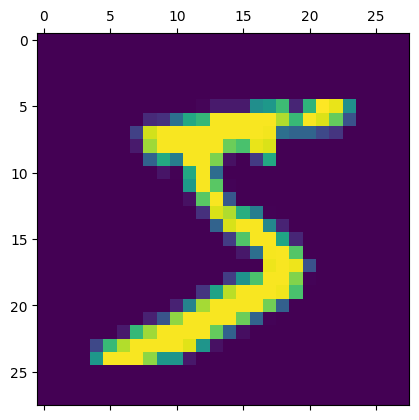

In [ ]:
plt.matshow(x_train[0])


In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Flattening the train and test data
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [ ]:
x_train_flattened.shape


(60000, 784)

In [ ]:
# Sequential create a stack of layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4747 - accuracy: 0.8763
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.9153
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9215
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.9236
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2618 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2581 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2553 - accuracy: 0.9298
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2528 - accuracy: 0.9303
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.250

In [ ]:
model.evaluate(x_test_flattened, y_test)


313/313 [==============================] - 1s 1ms/step - loss: 0.2665 - accuracy: 0.9259


[0.26652488112449646, 0.9258999824523926]

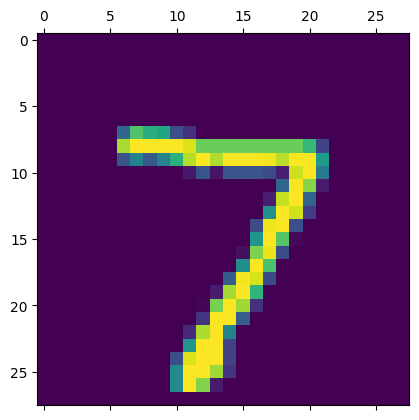

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.9322600e-03, 8.8126040e-09, 1.2760931e-02, 9.6247000e-01,
       1.5160368e-03, 1.1543191e-01, 2.7755977e-08, 9.9983203e-01,
       6.4036481e-02, 5.3597897e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7